<a href="https://colab.research.google.com/github/ArnavTripathi1/WOC-7.0-PROJECT/blob/main/N_Layer_Neural_Network_(Binary).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Neural Network**



## **1. Loading Modules**







In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **2. Importing and Handling Data**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')            # mounting google drive

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/nn_train.csv', delimiter = ',', nrows = 10000)       # reading train set
df1 = df.drop(columns = ['ID', 'class_label'])
print(df1.shape)

(10000, 1025)




`Dividing Data into Train, CV and Test Set`













In [ ]:
print('TRAIN SET')
print(df1.iloc[:8000])

print()
print()

print('CROSS VALIDATION SET')
print(df1.iloc[8000:9000])

print()
print()

print('TEST SET')
print(df1.iloc[9000:])

TRAIN SET
      Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0            81        109         91         96        107         97   
1           168        168        169        169        170        171   
2            14         20         32          6         27          6   
3            60        109        157        126         82         80   
4            63         72         86         75         93         77   
...         ...        ...        ...        ...        ...        ...   
7995         46         42         57         74         87         59   
7996        121        121        122        122        124        126   
7997         96         94         92         92         93         94   
7998        158        158        158        158        158        158   
7999         56         59         76         80         24         53   

      Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_1016  \
0           103         95   

In [ ]:
df_train = df.iloc[:8000]
df_cv = df.iloc[8000:9000]
df_test = df.iloc[9000:]




`Arranging Train Set as an array`




In [ ]:
features_train = df_train.loc[:, 'Feature_1':'Feature_1024']

x_train = features_train.to_numpy()
y_train = df_train['binary_label'].to_numpy().reshape(8000,1)

print(f"x_train = {x_train}")
print()
print(f"y_train = {y_train}")

x_train = [[ 81 109  91 ...  92  78  78]
 [168 168 169 ...  44  44  44]
 [ 14  20  32 ...  48  43  41]
 ...
 [ 96  94  92 ... 131 134 131]
 [158 158 158 ... 197 189 184]
 [ 56  59  76 ...  70  64  60]]

y_train = [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


`Checking for skewed dataset`

In [ ]:
count_of_ones = np.sum(y_train == 1)

print("Number of 1s:", count_of_ones)

Number of 1s: 3971


`x_train Normalization`

In [ ]:
mean = np.mean(x_train, axis = 0)
std = np.std(x_train, axis = 0)

x_train = (x_train - mean) / std

print(f"Normalized x_train = {x_train}")

Normalized x_train = [[-0.49353373 -0.09914044 -0.38396936 ... -0.33494566 -0.56147072
  -0.5439826 ]
 [ 0.76467384  0.76661878  0.7652921  ... -1.16633957 -1.14662066
  -1.12196411]
 [-1.46249818 -1.4051162  -1.25328252 ... -1.09705674 -1.16383095
  -1.17296248]
 ...
 [-0.27660139 -0.31924871 -0.36923524 ...  0.3405619   0.40230564
   0.35698858]
 [ 0.62005228  0.61987993  0.60321677 ...  1.48372852  1.34887171
   1.25795976]
 [-0.85508763 -0.83283469 -0.60498118 ... -0.7160012  -0.80241481
  -0.84997281]]


## **3. Visualising the Data**

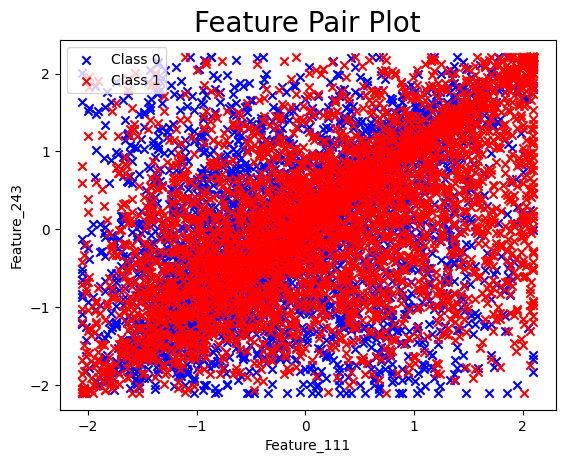

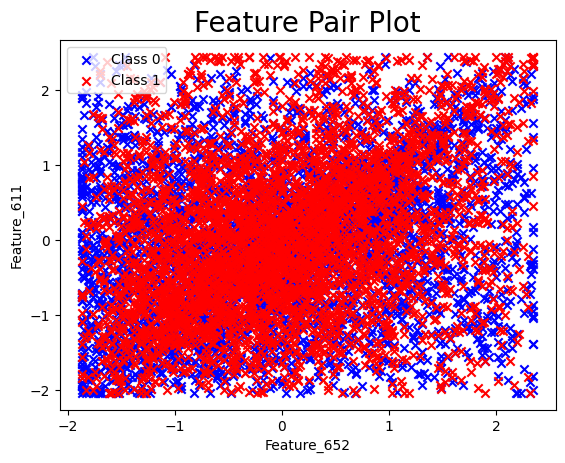

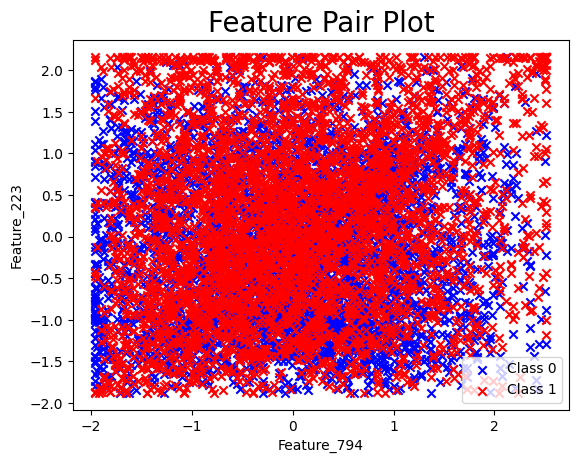

In [ ]:
random_features = np.random.choice(x_train.shape[1], 6, replace=False)

for i in range(3):
  feature_x = random_features[2 * i]
  feature_y = random_features[2 * i + 1]

  plt.scatter(x_train[y_train[:, 0] == 0, feature_x], x_train[y_train[:, 0] == 0, feature_y], marker='x', c='b', label='Class 0')

  plt.scatter(x_train[y_train[:, 0] == 1, feature_x], x_train[y_train[:, 0] == 1, feature_y], marker='x', c='r', label='Class 1')

  plt.title('Feature Pair Plot', fontdict={'fontsize': 20})
  plt.ylabel('Feature_' + str(feature_y + 1))
  plt.xlabel('Feature_' + str(feature_x + 1))                                   # +1 because index starts from 0

  plt.legend()
  plt.show()

##**4. Model Initialization**

In [ ]:
m = x_train.shape[0]
n = x_train.shape[1]

## **Defining Sigmoid Function**

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

## **Defining ReLU Function**

In [ ]:
def relu(z):
  return np.maximum(0, z)

## **Defining Dense Layer**

In [ ]:
def dense(x, w, b, g):
  z = np.matmul(x, w) + b
  a = g(z)
  return z, a

## **Stringing Layers Sequentially / model = Sequential()**

In [ ]:
def sequential(x, w1, b1, w2, b2, w3, b3, w4, b4):
  _, a1 = dense(x, w1, b1, relu)
  _, a2 = dense(a1, w2, b2, relu)
  _, a3 = dense(a2, w3, b3, relu)
  _, a4 = dense(a3, w4, b4, sigmoid)
  return a1, a2, a3, a4

## **Defining Cost Function**

In [ ]:
def cost_function(x, y, w1, b1, w2, b2, w3, b3, w4, b4):
  _, _, _, a4 = sequential(x, w1, b1, w2, b2, w3, b3, w4, b4)

  epsilon = 1e-15
  J_wb = -np.sum((y * np.log(a4 + epsilon)) + (1 - y) * np.log(1 - a4 + epsilon)) / m

  return J_wb                                                             # cost function

## **5. Backward Propogation**

`Defining Gradient`

`ReLU gradient`

In [ ]:
def gradient_relu(z):
    return (z > 0).astype(float)

`Sigmoid Gradient`

In [ ]:
def gradient_sigmoid(z):
  return sigmoid(z) * (1 - sigmoid(z))

`Backward Propogation`

In [ ]:
def back_prop(w1, b1, w2, b2, w3, b3, w4, b4):
  a1, a2, a3, a4 = sequential(x_train, w1, b1, w2, b2, w3, b3, w4, b4)

  err = a4 - y_train
  derr = err / m

  da4 = derr

  d4 = np.dot(a3, w4) + b4
  dd4 = da4 * gradient_sigmoid(d4)

  db4 = np.sum(dd4, axis = 0)
  dw4 = np.dot(a3.T, dd4)

  da3 = np.dot(dd4, w4.T)
  d3 = np.dot(a2, w3) + b3
  dd3 = da3 * gradient_relu(d3)

  db3 = np.sum(dd3, axis = 0)
  dw3 = np.dot(a2.T, dd3)

  da2 = np.dot(dd3, w3.T)
  d2 = np.dot(a1, w2) + b2
  dd2 = da2 * gradient_relu(d2)

  db2 = np.sum(dd2, axis = 0)
  dw2 = np.dot(a1.T, dd2)

  da1 = np.dot(dd2, w2.T)
  d1 = np.dot(x_train, w1) + b1
  dd1 = da1 * gradient_relu(d1)

  db1 = np.sum(dd1, axis = 0)
  dw1 = np.dot(x_train.T, dd1)

  return dw1, db1, dw2, db2, dw3, db3, dw4, db4

## **6. Defining Gradient Descent**

`Gradient Descent`

In [ ]:
def gradient_descent(x_train, y_train, w1, b1, w2, b2, w3, b3, w4, b4, alpha, num_iters):

  J_history = []

  for i in range(num_iters):

    dw1, db1, dw2, db2, dw3, db3, dw4, db4 = back_prop(w1, b1, w2, b2, w3, b3, w4, b4)

    w1 -= alpha * dw1
    b1 -= alpha * db1
    w2 -= alpha * dw2
    b2 -= alpha * db2
    w3 -= alpha * dw3
    b3 -= alpha * db3

    if i < 100000:
      J_history.append(cost_function(x_train, y_train, w1, b1, w2, b2, w3, b3, w4, b4))       # storing cost with every iteration for
                                                                                              # plotting later.
    if i % (num_iters//10) == 0:
      print(f"Epochs {i:6}/{epochs} : Cost {J_history[-1] :8.4f} ")

  return w1, b1, w2, b2, w3, b3, w4, b4, J_history

In [ ]:
w1_int = np.random.randn(1024, 50) * 0.01
b1_int = np.zeros((1, 50))
w2_int = np.random.randn(50, 25) * 0.01
b2_int = np.zeros((1, 25))
w3_int = np.random.randn(25, 12) * 0.01
b3_int = np.zeros((1, 12))
w4_int = np.random.randn(12, 1) * 0.01
b4_int = np.zeros((1, 1))

In [ ]:
epochs = 2000
tmp_alpha = 0.6                                 # learning rate

In [ ]:
%time

w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist = gradient_descent(x_train ,y_train, w1_int, b1_int, w2_int, b2_int, w3_int, b3_int, w4_int, b4_int,
                                                                                        tmp_alpha, epochs)


print(f"TRAIN COST estimated is ={J_hist[-1] : 8.4f}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.34 µs
Epochs    0/2000 : Cost   0.6931 
Epochs  200/2000 : Cost   0.6931 
Epochs  400/2000 : Cost   0.6931 
Epochs  600/2000 : Cost   0.6931 
Epochs  800/2000 : Cost   0.6931 
Epochs 1000/2000 : Cost   0.6931 
Epochs 1200/2000 : Cost   0.6931 
Epochs 1400/2000 : Cost   0.6931 
Epochs 1600/2000 : Cost   0.6931 
Epochs 1800/2000 : Cost   0.6931 
TRAIN COST estimated is =  0.6931


`Learning Curve (first batch)`

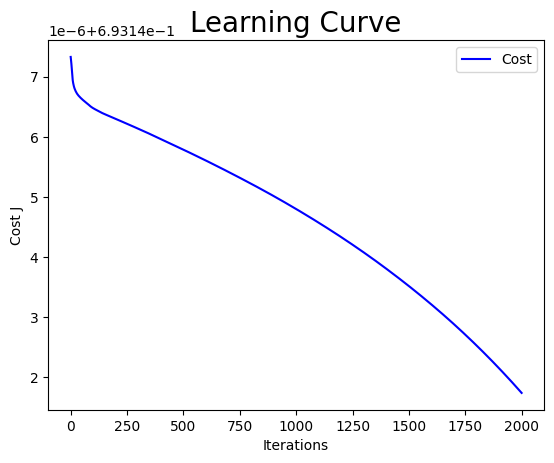

In [ ]:
plt.plot(np.arange(len(J_hist)), J_hist, 'b', label = 'Cost')
plt.title('Learning Curve', fontdict = {'fontsize' : 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')

plt.legend()

plt.show()

`Gradient Descent Continued`

In [ ]:
%time
additional_epochs = 2000
changed_alpha = 0.5
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist_continued = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                     changed_alpha, additional_epochs)

print(f"TRAIN COST estimated is ={J_hist_continued[-1] : 8.4f}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 8.11 µs
Epochs    0/2000 : Cost   0.6931 
Epochs  200/2000 : Cost   0.6931 
Epochs  400/2000 : Cost   0.6931 
Epochs  600/2000 : Cost   0.6931 
Epochs  800/2000 : Cost   0.6931 
Epochs 1000/2000 : Cost   0.6931 
Epochs 1200/2000 : Cost   0.6931 
Epochs 1400/2000 : Cost   0.6931 
Epochs 1600/2000 : Cost   0.6931 
Epochs 1800/2000 : Cost   0.6931 
TRAIN COST estimated is =  0.6931


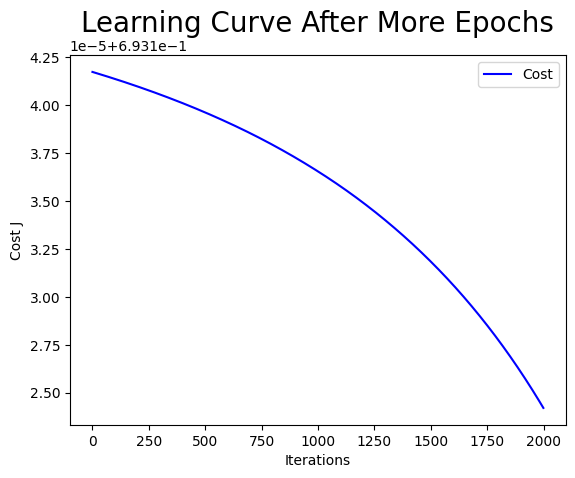

In [ ]:
plt.plot(np.arange(len(J_hist_continued)), J_hist_continued, 'b', label='Cost')
plt.title('Learning Curve After More Epochs', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

## **7. Gradient Descent of Batch 2**

`Reading Next Batch`

In [ ]:
df_batch2 = pd.read_csv('/content/drive/MyDrive/nn_train.csv', delimiter=',', skiprows=10000, nrows=10000)

df_train = df_batch2.iloc[:8000]
df_cv = df_batch2.iloc[8000:9000]
df_test = df_batch2.iloc[9000:]

features_batch2 = df_train.iloc[:, 1:1025]

x_train = features_batch2.to_numpy()
y_train = df_train.iloc[:, 1025].to_numpy().reshape(8000, 1)


x_train = (x_train - mean) / std                                 # same normalization

print(f"x_next_batch = {x_train}")
print(f"y_next_batch = {y_train}")

x_next_batch = [[-0.68154176 -0.64207418 -0.60498118 ... -0.59475625 -0.54426043
  -0.50998369]
 [-0.04520689 -0.12848821 -0.25136227 ... -0.64671837 -0.87125598
  -0.18699402]
 [ 0.60559013  0.60520605  0.60321677 ... -0.9758118  -0.99172803
  -0.968969  ]
 ...
 [-1.33233878 -1.36109455 -0.60498118 ...  1.27588005  1.38329229
   1.30895813]
 [ 1.96503279  1.98455124  1.97349005 ...  2.4883295   2.4675407
   2.37992387]
 [-0.5369202  -0.36327037 -0.26609639 ...  0.82554168 -1.35314416
  -1.73394453]]
y_next_batch = [[0]
 [1]
 [0]
 ...
 [0]
 [1]
 [0]]


`Gradient Descent`

In [ ]:
epochs = 4000
tmp_alpha = 0.5                                 # learning rate

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist_batch2 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, epochs)



print(f"TRAIN COST estimated of second batch is ={J_hist_batch2[-1] : 8.4f}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
Epochs    0/4000 : Cost   0.6848 
Epochs  400/4000 : Cost   0.6591 
Epochs  800/4000 : Cost   0.6541 
Epochs 1200/4000 : Cost   0.6503 
Epochs 1600/4000 : Cost   0.6468 
Epochs 2000/4000 : Cost   0.6437 
Epochs 2400/4000 : Cost   0.6407 
Epochs 2800/4000 : Cost   0.6377 
Epochs 3200/4000 : Cost   0.6340 
Epochs 3600/4000 : Cost   0.6284 
TRAIN COST estimated of second batch is =  0.6208


`Learning Curve (Batch 2)`

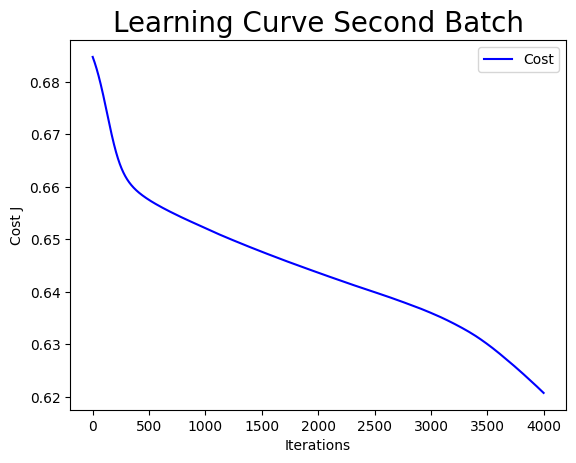

In [ ]:
plt.plot(np.arange(len(J_hist_batch2)), J_hist_batch2, 'b', label='Cost')
plt.title('Learning Curve Second Batch', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

`Gradient Descent Continued`

In [ ]:
%time
epochs = 6000
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist_continued2 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                     tmp_alpha, epochs)

print(f"TRAIN COST estimated is ={J_hist_continued2[-1] : 8.4f}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.63 µs
Epochs    0/6000 : Cost   0.3690 
Epochs  600/6000 : Cost   0.3306 
Epochs 1200/6000 : Cost   0.2958 
Epochs 1800/6000 : Cost   0.2644 
Epochs 3000/6000 : Cost   0.2174 
Epochs 3600/6000 : Cost   0.2020 
Epochs 4200/6000 : Cost   0.1835 
Epochs 4800/6000 : Cost   0.1726 
Epochs 5400/6000 : Cost   0.1641 
TRAIN COST estimated is =  0.1573


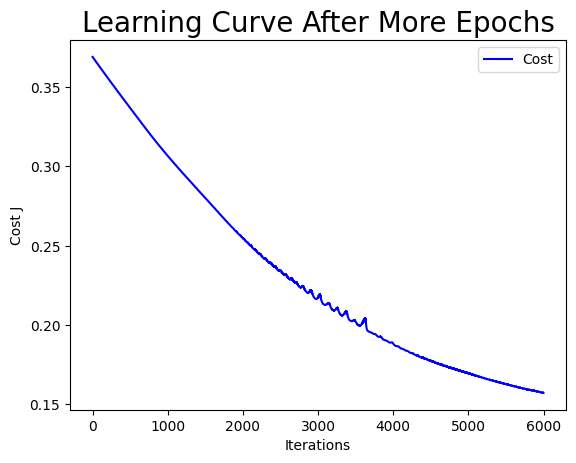

In [ ]:
plt.plot(np.arange(len(J_hist_continued2)), J_hist_continued2, 'b', label='Cost')
plt.title('Learning Curve After More Epochs', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

## **8. Gradient Descent of Batch 3**

`Reading Next Batch`

In [ ]:
df_batch3 = pd.read_csv('/content/drive/MyDrive/nn_train.csv', delimiter=',', skiprows=20000, nrows=10000)

df_train = df_batch3.iloc[:8000]
df_cv = df_batch3.iloc[8000:9000]
df_test = df_batch3.iloc[9000:]

features_batch3 = df_train.iloc[:, 1:1025]

x_train = features_batch3.to_numpy()
y_train = df_train.iloc[:, 1025].to_numpy().reshape(8000, 1)


x_train = (x_train - mean) / std                                 # same normalization

print(f"x_next_batch = {x_train}")
print(f"y_next_batch = {y_train}")

x_next_batch = [[ 1.12622774  1.16281368  1.1778475  ...  0.13271342  0.21299242
   0.35698858]
 [-0.00182042 -0.0404449  -0.07455281 ... -1.58203652 -1.61129854
  -1.73394453]
 [-0.59476882 -0.55403087 -0.51657645 ...  0.44448613  0.2646233
   0.16999456]
 ...
 [ 0.24403623  0.32640223  0.35273671 ...  1.17195581  1.1423482
   0.93497009]
 [-1.23110368 -1.14098627 -0.69338591 ... -1.49543299 -1.43919562
  -1.3599565 ]
 [ 0.48989288  0.66390159  0.45587556 ... -0.7160012   0.14415126
  -0.71397716]]
y_next_batch = [[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


`Gradient Descent`

In [ ]:
epochs = 10000
tmp_alpha = 0.5                                 # learning rate

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist_batch3 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, epochs)



print(f"TRAIN COST estimated of second batch is ={J_hist_batch3[-1] : 8.4f}")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.54 µs
Epochs      0/10000 : Cost   0.5058 
Epochs   1000/10000 : Cost   0.3519 
Epochs   2000/10000 : Cost   0.3042 
Epochs   3000/10000 : Cost   0.2812 
Epochs   4000/10000 : Cost   0.2678 
Epochs   5000/10000 : Cost   0.2542 
Epochs   6000/10000 : Cost   0.2441 
Epochs   7000/10000 : Cost   0.2341 
Epochs   8000/10000 : Cost   0.2267 
Epochs   9000/10000 : Cost   0.2223 
TRAIN COST estimated of second batch is =  0.2156


In [ ]:
# df = pd.DataFrame(w1_fin)
# df.to_csv('/content/drive/MyDrive/w1.csv', index=False)
# df = pd.DataFrame(b1_fin)
# df.to_csv('/content/drive/MyDrive/b1.csv', index=False)
# df = pd.DataFrame(w2_fin)
# df.to_csv('/content/drive/MyDrive/w2.csv', index=False)
# df = pd.DataFrame(b2_fin)
# df.to_csv('/content/drive/MyDrive/b2.csv', index=False)
# df = pd.DataFrame(w3_fin)
# df.to_csv('/content/drive/MyDrive/w3.csv', index=False)
# df = pd.DataFrame(b3_fin)
# df.to_csv('/content/drive/MyDrive/b3.csv', index=False)
# df = pd.DataFrame(w4_fin)
# df.to_csv('/content/drive/MyDrive/w4.csv', index=False)
# df = pd.DataFrame(b4_fin)
# df.to_csv('/content/drive/MyDrive/b4.csv', index=False)

In [ ]:
# df = pd.DataFrame(J_hist)
# df.to_csv('/content/drive/MyDrive/J_hist.csv', index=False)
# df = pd.DataFrame(J_hist_continued)
# df.to_csv('/content/drive/MyDrive/J_hist_continued.csv', index=False)
# df = pd.DataFrame(J_hist_batch2)
# df.to_csv('/content/drive/MyDrive/J_hist_batch_2.csv', index=False)
# df = pd.DataFrame(J_hist_continued2)
# df.to_csv('/content/drive/MyDrive/J_hist_continued2.csv', index=False)
# df = pd.DataFrame(J_hist_batch3)
# df.to_csv('/content/drive/MyDrive/J_hist_batch3.csv', index=False)

`Learning Curve (Batch 3)`

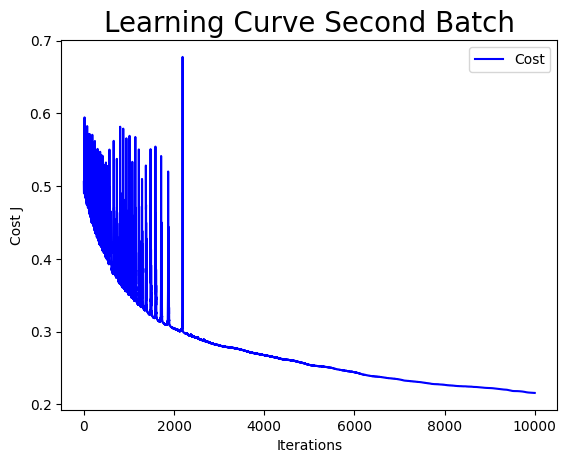

In [ ]:
plt.plot(np.arange(len(J_hist_batch3)), J_hist_batch3, 'b', label='Cost')
plt.title('Learning Curve Second Batch', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

##**9. Gradient Descent of Batch 4**

`Reading Batch 4`

In [ ]:
df_batch4 = pd.read_csv('/content/drive/MyDrive/nn_train.csv', delimiter=',', skiprows=30000, nrows=10000)

df_train = df_batch4.iloc[:8000]
df_cv = df_batch4.iloc[8000:9000]
df_test = df_batch4.iloc[9000:]

features_batch4 = df_train.iloc[:, 1:1025]

x_train = features_batch4.to_numpy()
y_train = df_train.iloc[:, 1025].to_numpy().reshape(8000, 1)


x_train = (x_train - mean) / std                                 # same normalization

print(f"x_next_batch = {x_train}")
print(f"y_next_batch = {y_train}")

x_next_batch = [[ 0.96714403  1.11879202  1.1778475  ...  1.1546351   0.83256294
   0.4249864 ]
 [ 0.04156604  0.03292453  0.01385192 ... -1.72060218 -1.7145603
  -1.68294616]
 [ 1.15515206  0.39977165  0.30853434 ...  1.50104923  1.48655404
   1.3599565 ]
 ...
 [-0.27660139 -0.20185763 -0.19242578 ... -0.94117038 -0.92288686
  -0.93497009]
 [ 0.44650641  0.44379331  0.44114143 ...  0.28859978  0.2646233
   0.2719913 ]
 [ 1.8637977   1.85248627  1.81141472 ...  0.70429673  0.07531009
  -0.968969  ]]
y_next_batch = [[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


`Gradient Descent`

In [ ]:
epochs = 10000
tmp_alpha = 0.5

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist_batch4 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, epochs)



print(f"TRAIN COST estimated of fourth batch is ={J_hist_batch4[-1] : 8.4f}")

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.44 µs
Epochs      0/10000 : Cost   1.0113 
Epochs   1000/10000 : Cost   0.4860 
Epochs   2000/10000 : Cost   0.4278 
Epochs   3000/10000 : Cost   0.3982 
Epochs   4000/10000 : Cost   0.3746 
Epochs   5000/10000 : Cost   0.3611 
Epochs   6000/10000 : Cost   0.3538 
Epochs   7000/10000 : Cost   0.3373 
Epochs   8000/10000 : Cost   0.3288 
Epochs   9000/10000 : Cost   0.3181 
TRAIN COST estimated of second batch is =  0.3120


`Learning Curve`

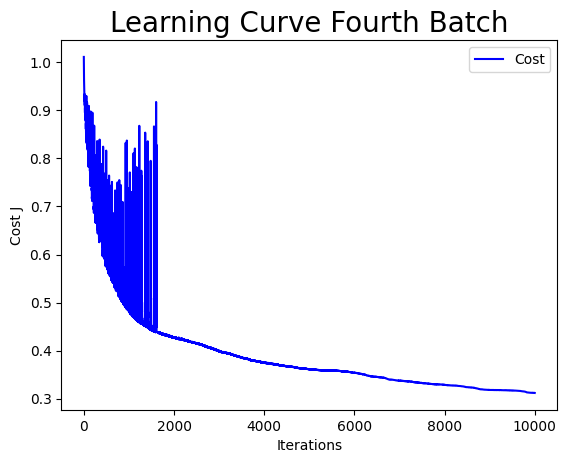

In [ ]:
plt.plot(np.arange(len(J_hist_batch4)), J_hist_batch4, 'b', label='Cost')
plt.title('Learning Curve Fourth Batch', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

##**10. Gradient Descent of Batch 5**

`Reading Batch 5`

In [ ]:
df_batch5 = pd.read_csv('/content/drive/MyDrive/nn_train.csv', delimiter=',', skiprows=40000, nrows=10000)

df_train = df_batch5.iloc[:8000]
df_cv = df_batch5.iloc[8000:9000]
df_test = df_batch5.iloc[9000:]

features_batch4 = df_train.iloc[:, 1:1025]

x_train = features_batch4.to_numpy()
y_train = df_train.iloc[:, 1025].to_numpy().reshape(8000, 1)


x_train = (x_train - mean) / std                                 # same normalization

print(f"x_next_batch = {x_train}")
print(f"y_next_batch = {y_train}")

x_next_batch = [[-1.11540644 -1.22902958 -1.15014367 ... -0.26566283 -0.40657809
  -0.50998369]
 [ 1.45885733  1.47096526  1.42832756 ... -1.75524359 -1.66292942
  -1.54695051]
 [ 0.6489766   0.16498949  0.13172489 ...  0.23663766  0.19578213
   0.47598477]
 ...
 [ 0.09941467  0.07694618  0.01385192 ... -1.5300744  -1.50803679
  -1.41095486]
 [ 0.9092954   0.41444554  0.64741913 ...  1.4317664   1.40050258
   1.63194779]
 [-1.01417134 -1.09696462 -0.98806834 ... -0.14441789  0.0580998
   0.20399347]]
y_next_batch = [[0]
 [0]
 [1]
 ...
 [0]
 [1]
 [0]]


`Gradient Descent`

In [ ]:
epochs = 10000
tmp_alpha = 0.5

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist_batch5 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, epochs)



print(f"TRAIN COST estimated of fifth batch is ={J_hist_batch5[-1] : 8.4f}")

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 11.2 µs
Epochs      0/10000 : Cost   1.1680 
Epochs   1000/10000 : Cost   0.5837 
Epochs   2000/10000 : Cost   0.5074 
Epochs   3000/10000 : Cost   0.4722 
Epochs   4000/10000 : Cost   0.4541 
Epochs   5000/10000 : Cost   0.4359 
Epochs   6000/10000 : Cost   0.4220 
Epochs   7000/10000 : Cost   0.4074 
Epochs   8000/10000 : Cost   0.3999 
Epochs   9000/10000 : Cost   0.3930 
TRAIN COST estimated of fifth batch is =  0.3910


`Learning Curve of Batch 5`

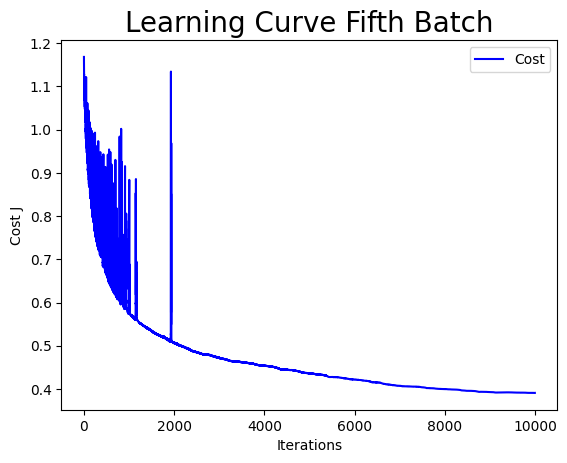

In [ ]:
plt.plot(np.arange(len(J_hist_batch5)), J_hist_batch5, 'b', label='Cost')
plt.title('Learning Curve Fifth Batch', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

##**11. Gradient Descent of Batch 6**

`Reading Batch 6`

In [ ]:
df_batch6 = pd.read_csv('/content/drive/MyDrive/nn_train.csv', delimiter=',', skiprows=50000, nrows=10000)

df_train = df_batch6.iloc[:8000]
df_cv = df_batch6.iloc[8000:9000]
df_test = df_batch6.iloc[9000:]

features_batch6 = df_train.iloc[:, 1:1025]

x_train = features_batch6.to_numpy()
y_train = df_train.iloc[:, 1025].to_numpy().reshape(8000, 1)


x_train = (x_train - mean) / std                                 # same normalization

print(f"x_next_batch = {x_train}")
print(f"y_next_batch = {y_train}")

x_next_batch = [[ 0.14280114  0.20901115  0.11699077 ...  1.18927651  1.10792762
   1.0879652 ]
 [ 0.2874227   0.28238057  0.26433198 ...  0.44448613  0.50556739
   0.5439826 ]
 [-0.85508763 -0.86218246 -0.88492949 ... -0.66403908 -0.71636335
  -0.84997281]
 ...
 [ 1.38654655  1.30955253  1.26625223 ... -1.33954663 -0.99172803
  -0.79897444]
 [-1.50588465 -1.5078334  -1.43009198 ... -1.89380924 -1.86945293
  -1.83594127]
 [-0.08859336 -0.11381432 -0.05981869 ...  1.29320075  0.76372177
   1.15596302]]
y_next_batch = [[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [1]]


`Gradient Descent`

In [ ]:
epochs = 10200
tmp_alpha = 0.5

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist_batch6 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, epochs)



print(f"TRAIN COST estimated of sixth batch is ={J_hist_batch6[-1] : 8.4f}")

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.78 µs
Epochs      0/10200 : Cost   1.2782 
Epochs   1020/10200 : Cost   0.6202 
Epochs   2040/10200 : Cost   0.5512 
Epochs   3060/10200 : Cost   0.5179 
Epochs   4080/10200 : Cost   0.4903 
Epochs   5100/10200 : Cost   0.4726 
Epochs   6120/10200 : Cost   0.4498 
Epochs   7140/10200 : Cost   0.4427 
Epochs   8160/10200 : Cost   0.4298 
Epochs   9180/10200 : Cost   0.4195 
TRAIN COST estimated of sixth batch is =  0.4104


`Learning Curve`

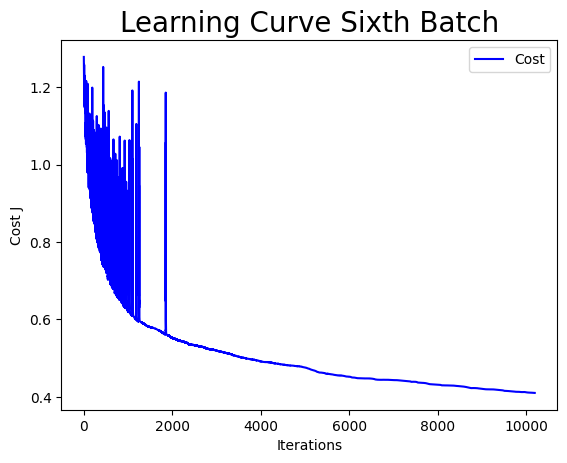

In [ ]:
plt.plot(np.arange(len(J_hist_batch6)), J_hist_batch6, 'b', label='Cost')
plt.title('Learning Curve Sixth Batch', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

##**12. Gradient Descent of Batch 7**

`Reading Batch 7`

In [ ]:
df_batch7 = pd.read_csv('/content/drive/MyDrive/nn_train.csv', delimiter=',', skiprows=60000, nrows=10000)

df_train = df_batch7.iloc[:8000]
df_cv = df_batch7.iloc[8000:9000]
df_test = df_batch7.iloc[9000:]

features_batch7 = df_train.iloc[:, 1:1025]

x_train = features_batch7.to_numpy()
y_train = df_train.iloc[:, 1025].to_numpy().reshape(8000, 1)


x_train = (x_train - mean) / std                                 # same normalization

print(f"x_next_batch = {x_train}")
print(f"y_next_batch = {y_train}")

x_next_batch = [[-0.05966905 -0.05511878 -0.05981869 ... -0.35226636 -0.35494722
  -0.37398804]
 [-0.21875276 -0.3339226  -0.47237409 ... -0.02317294 -0.09679283
  -0.28899076]
 [ 0.6489766   0.66390159  0.67688738 ...  0.80822097  0.78093207
   0.86697227]
 ...
 [-1.56373327 -1.47848563 -1.66583792 ... -0.38690778 -0.6131016
  -0.98596846]
 [-0.8984741  -1.12631239 -1.00280246 ...  0.54841037  0.53998798
   0.4249864 ]
 [-0.55138235 -0.58337864 -0.59024706 ... -0.49083202 -0.49262955
  -0.49298423]]
y_next_batch = [[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]


`Gradient Descent`

In [ ]:
epochs = 10200
tmp_alpha = 0.5

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist_batch7 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, epochs)



print(f"TRAIN COST estimated of seventh batch is ={J_hist_batch7[-1] : 8.4f}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
Epochs      0/10200 : Cost   1.3694 
Epochs   1020/10200 : Cost   0.7103 
Epochs   2040/10200 : Cost   0.6138 
Epochs   3060/10200 : Cost   0.5830 
Epochs   4080/10200 : Cost   0.5640 
Epochs   5100/10200 : Cost   0.5467 
Epochs   6120/10200 : Cost   0.5305 
Epochs   7140/10200 : Cost   0.5272 
Epochs   8160/10200 : Cost   0.5169 
Epochs   9180/10200 : Cost   0.5013 
TRAIN COST estimated of seventh batch is =  0.4909


`Learning Curve`

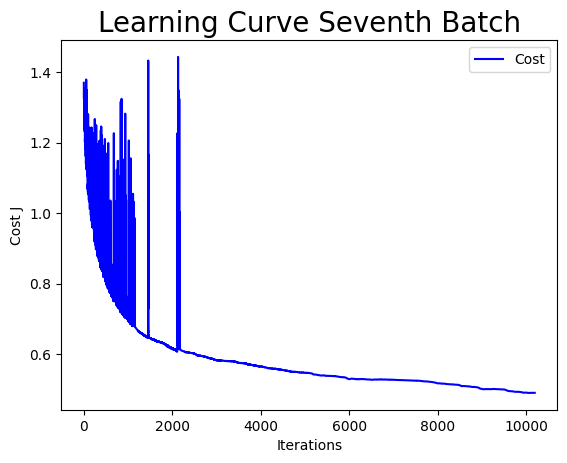

In [ ]:
plt.plot(np.arange(len(J_hist_batch7)), J_hist_batch7, 'b', label='Cost')
plt.title('Learning Curve Seventh Batch', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

##**13. Gradient Descent of Batch 8**

`Reading Batch 8`

In [ ]:
df_batch8 = pd.read_csv('/content/drive/MyDrive/nn_train.csv', delimiter=',', skiprows=70000, nrows=10000)

df_train = df_batch8.iloc[:8000]
df_cv = df_batch8.iloc[8000:9000]
df_test = df_batch8.iloc[9000:]

features_batch8 = df_train.iloc[:, 1:1025]

x_train = features_batch8.to_numpy()
y_train = df_train.iloc[:, 1025].to_numpy().reshape(8000, 1)


x_train = (x_train - mean) / std                                 # same normalization

print(f"x_next_batch = {x_train}")
print(f"y_next_batch = {y_train}")

x_next_batch = [[ 0.04156604  0.2530328   0.23486374 ...  0.16735483  0.09252038
   0.03399891]
 [ 0.31634701  0.34107611  0.36747083 ... -0.69868049 -0.75078394
  -0.78197498]
 [ 0.5477415  -0.31924871 -0.36923524 ... -1.07973604 -1.38756475
   0.40798695]
 ...
 [ 0.48989288  0.47314108  0.44114143 ... -0.10977647 -0.13121342
  -0.18699402]
 [-1.27449015 -1.12631239 -1.12067543 ...  0.20199624  0.12694096
  -0.30599021]
 [-0.04520689 -0.06979267 -0.1334893  ...  1.17195581  1.17676878
   1.15596302]]
y_next_batch = [[1]
 [0]
 [1]
 ...
 [1]
 [1]
 [0]]


`Gradient Descent`

In [ ]:
epochs = 10000
tmp_alpha = 0.5

In [ ]:
%time
w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin, J_hist_batch8 = gradient_descent(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin,
                                                                                                  tmp_alpha, epochs)



print(f"TRAIN COST estimated of eight batch is ={J_hist_batch8[-1] : 8.4f}")

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
Epochs      0/10000 : Cost   1.3203 
Epochs   1000/10000 : Cost   0.7181 
Epochs   2000/10000 : Cost   0.6763 
Epochs   3000/10000 : Cost   0.6397 
Epochs   4000/10000 : Cost   0.6220 
Epochs   5000/10000 : Cost   0.6000 
Epochs   6000/10000 : Cost   0.5864 
Epochs   7000/10000 : Cost   0.5724 
Epochs   8000/10000 : Cost   0.5643 
Epochs   9000/10000 : Cost   0.5573 
TRAIN COST estimated of eight batch is =  0.5469


`Learning Curve of Batch 8`

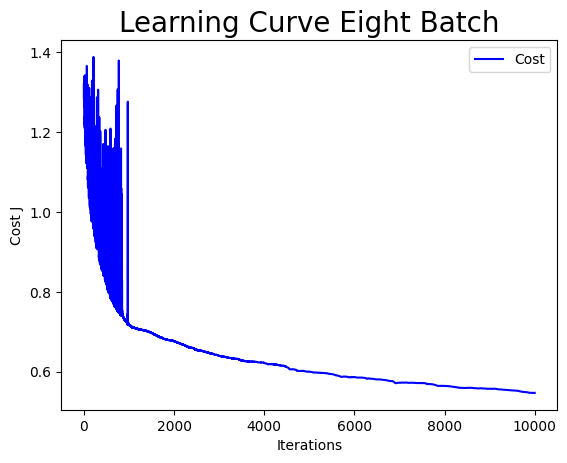

In [ ]:
plt.plot(np.arange(len(J_hist_batch8)), J_hist_batch8, 'b', label='Cost')
plt.title('Learning Curve Eight Batch', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.legend()
plt.show()

##**14. Learned Parameters**

In [ ]:
print(f'Obtained weights = {w1_fin}' )
print(f'{w2_fin}' )
print(f'{w3_fin}' )
print(f'{w4_fin}' )
print()
print(f'Obtained bias terms = {b1_fin}')
print(f'{b2_fin}')
print(f'{b3_fin}')
print(f'{b4_fin}')

Obtained weights = [[ 0.03811432 -0.17231639 -0.03845661 ... -0.0604809  -0.01764902
   0.08248677]
 [ 0.09692583 -0.10879494 -0.06124191 ... -0.14509397 -0.03767616
   0.04376554]
 [ 0.05335711 -0.01839639 -0.04981369 ... -0.10977737 -0.00149706
   0.07010186]
 ...
 [-0.01040023 -0.05579697  0.05234366 ...  0.03058433  0.08130065
   0.0236891 ]
 [-0.02356108 -0.07112829  0.05462586 ...  0.03806505  0.06770737
   0.02338178]
 [-0.01242946 -0.14908672  0.02272419 ...  0.05146052  0.08300451
   0.01732714]]
[[-6.27314776e-03 -7.90158995e-02  5.78059425e-01 ... -1.41269455e-02
  -1.51677972e+00  6.89796795e-02]
 [-1.96718386e-03 -6.73865822e-02  5.14218109e-01 ...  4.27834670e-03
  -1.34948526e+00  8.21115586e-02]
 [-2.52738340e-03  7.50406351e-02 -1.54578546e-01 ... -1.35454462e-03
   6.65640028e-01 -2.74441577e-02]
 ...
 [-1.46738340e-02  1.27762739e-01 -2.40226734e-01 ... -1.54529566e-03
   1.64635692e+00 -3.16641643e-02]
 [-2.86167091e-03  8.44361070e-02  6.37759830e-01 ...  1.5147367

##**15. Estimating Cross Validation Cost**

`CV Set`




In [ ]:
features_cv = df_cv.iloc[:, 1:1025]

x_cv = features_cv.to_numpy()
y_cv = df_cv.iloc[:, 1025].to_numpy().reshape(1000, 1)


`Same Normalization`




In [ ]:
x_cv = (x_cv - mean) / std

print(f"x_cv = {x_cv}")
print(f"y_cv = {y_cv}")

x_cv = [[ 0.63451444  0.67857547  1.08944277 ... -0.52547343 -0.52705014
  -0.50998369]
 [-0.36337432 -0.31924871 -0.47237409 ...  1.08535228  1.31445112
   1.17296248]
 [-0.55138235 -0.65674807 -0.70812003 ... -0.54279413 -0.56147072
  -0.57798151]
 ...
 [ 0.57666582  0.57585828  0.55901441 ...  0.82554168  0.81535265
   0.8159739 ]
 [-0.62369313 -0.70076972 -0.76705652 ...  0.23663766  0.16136155
   0.10199674]
 [ 0.34527132  0.34107611  0.32326846 ...  0.46180684  0.47114681
   0.47598477]]
y_cv = [[1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]

In [ ]:
m_cv = x_cv.shape[0]
print(m_cv)

1000


`Computing Cross Validation Cost`

In [ ]:
_, _, _, a4_cv = sequential(x_cv, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)

cv_cost = cost_function(x_cv, y_cv, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)
print(f"Cross-validation cost: {cv_cost:.4f}")

Cross-validation cost: 0.1853


##**16. Estimating Test Cost**

`Test Set`

In [ ]:
features_test = df_test.iloc[:, 1:1025]

x_test = features_test.to_numpy()
y_test = df_test.iloc[:, 1025].to_numpy().reshape(1000, 1)

`Same Normalization`

In [ ]:
x_test = (x_test - mean) / std

print(f"x_test = {x_test}")
print(f"y_test = {y_test}")

x_test = [[ 1.57455458  1.57368246  1.60513702 ...  0.98142804  1.19397908
   1.2409603 ]
 [-0.55138235 -0.56870476 -0.59024706 ...  1.13731439  1.38329229
   1.90393909]
 [-1.1587929  -1.28772512 -1.37115549 ... -1.13169816 -1.0433589
  -1.07096574]
 ...
 [-1.53480896 -1.12631239 -1.01753658 ... -1.65131935 -1.74898088
  -1.46195323]
 [ 0.01264173  0.9427054   1.42832756 ... -0.4388699  -0.97451773
  -0.56098205]
 [-0.03074474 -0.05511878 -0.04508457 ... -0.10977647  0.17857184
   0.61198042]]
y_test = [[1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 

In [ ]:
m_test = x_test.shape[0]
print(m_test)

1000


`Computing Test Cost`

In [ ]:
_, _, _, a4_test = sequential(x_test, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)

test_cost = cost_function(x_test, y_test, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)
print(f"Test cost: {test_cost:.4f}")

Test cost: 0.1708


##**17. Estimating Accuracy**

`Defining Threshold using CV set`

In [ ]:
def accuracy(x, y, w1, b1, w2, b2, w3, b3, w4, b4):
    _, _, _, a4 = sequential(x, w1, b1, w2, b2, w3, b3, w4, b4)
    predictions = (a4 > 0.5).astype(int)
    correct_predictions = np.sum(predictions == y)
    accuracy = (correct_predictions / len(y)) * 100
    return accuracy

cv_accuracy = accuracy(x_cv, y_cv, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)
print(f"Cross-validation accuracy: {cv_accuracy:.2f}%")

Cross-validation accuracy: 73.40%


`Accuracy of Test Set Predictions`

In [ ]:
test_accuracy = accuracy(x_test, y_test, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)
print(f"Test accuracy: {test_accuracy:.2f}%")

Test accuracy: 75.20%


`Accuracy of Train Set Predictions`

In [ ]:
train_accuracy = accuracy(x_train, y_train, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)
print(f"Train accuracy: {train_accuracy:.2f}%")

Train accuracy: 95.51%


##**18. Model Learning**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/J_hist.csv', delimiter = ',')
J_hist = df.to_numpy()
df = pd.read_csv('/content/drive/MyDrive/J_hist_continued.csv', delimiter = ',')
J_hist_continued = df.to_numpy()
df = pd.read_csv('/content/drive/MyDrive/J_hist_batch_2.csv', delimiter = ',')
J_hist_batch2 = df.to_numpy()
df = pd.read_csv('/content/drive/MyDrive/J_hist_continued2.csv', delimiter = ',')
J_hist_continued2 = df.to_numpy()
df = pd.read_csv('/content/drive/MyDrive/J_hist_batch3.csv', delimiter = ',')
J_hist_batch3 = df.to_numpy()

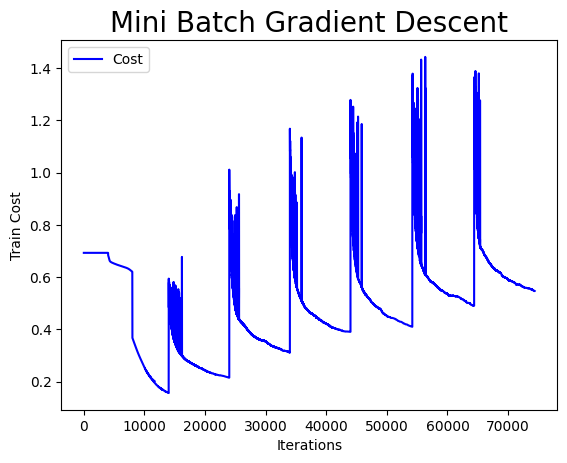

In [ ]:
J_hist_combined = np.append(J_hist, J_hist_continued, axis = 0)
J_hist_combined = np.append(J_hist_combined, J_hist_batch2, axis=0)
J_hist_combined = np.append(J_hist_combined, J_hist_continued2, axis=0)
J_hist_combined = np.append(J_hist_combined, J_hist_batch3, axis=0)
J_hist_combined = J_hist_combined.reshape(-1)
J_hist_combined = np.append(J_hist_combined, J_hist_batch4, axis=0)
J_hist_combined = np.append(J_hist_combined, J_hist_batch5, axis=0)
J_hist_combined = np.append(J_hist_combined, J_hist_batch6, axis=0)
J_hist_combined = np.append(J_hist_combined, J_hist_batch7, axis=0)
J_hist_combined = np.append(J_hist_combined, J_hist_batch8, axis=0)

plt.plot(np.arange(len(J_hist_combined)), J_hist_combined, 'b', label='Cost')
plt.title('Mini Batch Gradient Descent', fontdict={'fontsize': 20})
plt.xlabel('Iterations')
plt.ylabel('Train Cost')
plt.legend()
plt.show()

##**19. Final Model**

In [ ]:
def nn_binary(input, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin):

  a1 = relu(np.dot(input, w1_fin) + b1_fin)
  a2 = relu(np.dot(a1, w2_fin) + b2_fin)
  a3 = relu(np.dot(a2, w3_fin) + b3_fin)
  a4 = sigmoid(np.dot(a3, w4_fin) + b4_fin)

  return a4

## **11. Prediction For Test Set**

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/nn_test.csv', delimiter = ',')        # reading test set
df_test = df_test.drop(columns = ['ID'])
print(df_test.shape)

(20000, 1024)


`Test Set`

In [ ]:
features_test = df_test.loc[:, 'Feature_1':'Feature_1024']
x_test = features_test.to_numpy()


print(f"x_test = {x_test}")

x_test = [[ 52  36  23 ...  80  32  30]
 [118 119 120 ...  52  52  52]
 [162 166 171 ...  40  42  43]
 ...
 [255 255 254 ...  61  65  70]
 [ 81  95  95 ... 128 130 132]
 [172 212 160 ... 191 178 186]]


`Same Normalization`

In [ ]:
x_test = (x_test - mean) / std

print(f'x_test = {x_test}')

x_test = [[-0.91293625 -1.17033404 -1.38588961 ... -0.54279413 -1.35314416
  -1.3599565 ]
 [ 0.04156604  0.04759841  0.04332016 ... -1.02777392 -1.00893832
  -0.98596846]
 [ 0.67790091  0.73727101  0.79476035 ... -1.23562239 -1.18104124
  -1.13896356]
 ...
 [ 2.02288142  2.04324678  2.01769242 ... -0.87188756 -0.78520452
  -0.67997825]
 [-0.49353373 -0.30457483 -0.32503287 ...  0.28859978  0.33346447
   0.37398804]
 [ 0.82252247  1.41226972  0.63268501 ...  1.37980429  1.15955849
   1.29195867]]


`Prediction for Test Set`

In [ ]:
def predict(x, w1, b1, w2, b2, w3, b3, w4, b4, threshold=0.5):
    _, _, _, a4 = sequential(x, w1, b1, w2, b2, w3, b3, w4, b4)
    predictions = (a4 > threshold).astype(int)
    return predictions

binary_predictions = predict(x_test, w1_fin, b1_fin, w2_fin, b2_fin, w3_fin, b3_fin, w4_fin, b4_fin)
binary_predictions

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]])

`Saved the prediction in Google Drive`

In [ ]:
# df = pd.DataFrame(binary_predictions)
# df.columns = ['Prediction_nn_binaryclassification']
# df.to_csv('/content/drive/MyDrive/nn_binary_test_prediction.csv', index=False)